In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.style.use('ggplot')


In [2]:
path = 'Googling/Fit/Daily Aggregations'
files = os.listdir(path)
df = pd.DataFrame()
for f in files[1:-1]:
    temp_df = pd.read_csv(os.path.join(path,f))
    temp_df['Date'] = f[:-4]
    df = df.append(temp_df, sort=False)
df=df.dropna(thresh=4)
df.reset_index(inplace = True, drop=True)
df_daily = pd.read_csv(os.path.join(path, 'Daily Summaries.csv'))
df_daily.set_index('Date', drop=True, inplace = True)
df_daily = df_daily.drop(columns = ['Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)'])

In [9]:
df_runs = df_daily[df_daily['Running duration (ms)'].notnull()]
df_daily.drop(columns = 'Running duration (ms)', inplace = True)
df_daily.index = pd.to_datetime(df_daily.index)
df_daily['Day'] = df_daily.index.weekday_name

In [13]:
df.to_csv('GoogleFit/All_Data.csv', index=False, encoding='utf-8')
df_daily.to_csv('GoogleFit/Daily_Data.csv', index=False, encoding='utf-8')
df_runs.to_csv('GoogleFit/Runs_Data.csv', encoding='utf-8')

In [12]:
df_daily = pd.read_csv('Daily_Data.csv')

,Calories (kcal),Distance (m),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Move Minutes count,Inactive duration (ms),Walking duration (ms),Day
1,2011.792314,2307.518412,0.804637,1.371732,0.272167,6161,84.0,76056501,4640697.0,Monday
2,1870.794303,679.183790,1.517551,15.080000,0.303362,2651,40.0,78430462,2236856.0,Tuesday
3,1927.947979,1338.461325,0.525079,4.200000,0.251058,4313,64.0,77797645,3409920.0,Wednesday
4,1784.059092,636.830692,0.678267,3.560000,0.291218,2620,46.0,74895170,1715951.0,Thursday
5,2018.305019,2847.881039,1.695420,6.130000,0.279355,6112,77.0,79009953,4784456.0,Friday
...,...,...,...,...,...,...,...,...,...,...
427,1779.633177,2840.412050,2.246246,15.181793,0.247209,4938,74.0,80205312,1848536.0,Tuesday
428,1827.969054,3758.179293,1.912068,7.550000,0.242632,5944,71.0,81354985,2358443.0,Wednesday
429,1758.985979,2178.121592,0.499487,9.083463,0.260272,3999,54.0,77536776,1513549.0,Thursday
430,1732.194241,1768.653722,0.728005,14.324814,0.271589,2802,44.0,74895835,1078880.0,Friday


In [15]:
df_daily.count()

Calories (kcal)           431
Distance (m)              431
Average speed (m/s)       431
Max speed (m/s)           431
Min speed (m/s)           431
Step count                431
Move Minutes count        431
Inactive duration (ms)    431
Walking duration (ms)     431
Day                       431
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED5CE8CF08>,
      dtype=object)

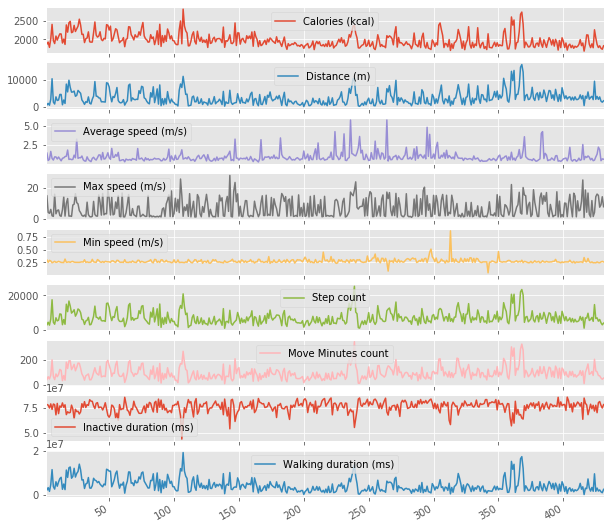

In [20]:
df_daily.plot(figsize=(10,10), subplots=True)

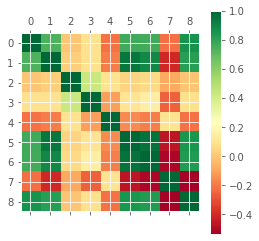

In [5]:
plt.matshow(df_daily.corr(), cmap='RdYlGn')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

Text(0.5, 0, '')

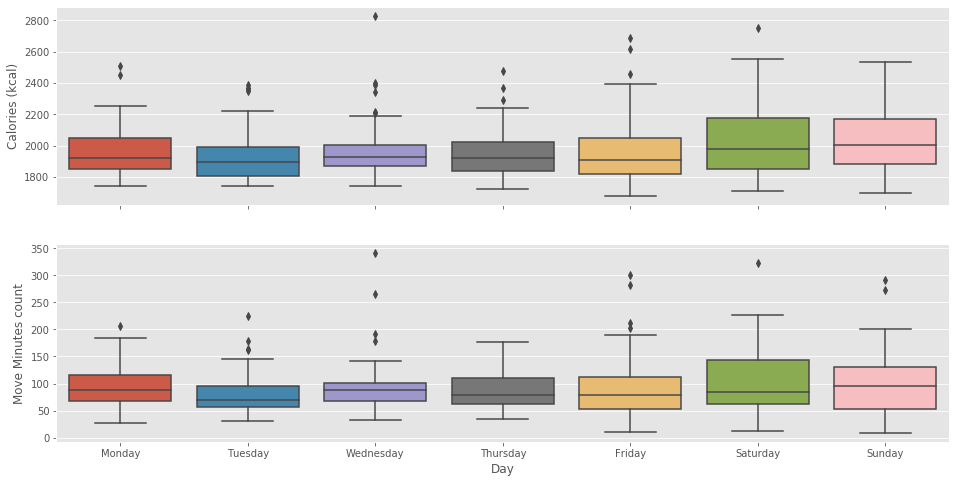

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
sns.boxplot(data=df_daily, x='Day', y='Calories (kcal)', ax=axes[0])
sns.boxplot(data=df_daily, x='Day', y='Move Minutes count')
axes[0].set_xlabel('')

In [69]:
df_daily[df_daily['Calories (kcal)'] > 2600][['Day', 'Calories (kcal)']]

,Day,Calories (kcal)
Date,,
2019-03-13,Wednesday,2828.508239
2019-11-22,Friday,2615.028643
2019-11-29,Friday,2688.799419
2019-11-30,Saturday,2748.255887


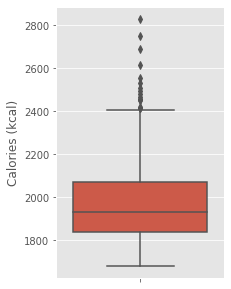

In [21]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=df_daily, y='Calories (kcal)');

In [45]:
gb = df_daily.groupby('Day')

In [202]:
df_daily_Cal = pd.DataFrame()
df_daily_Dis = pd.DataFrame()
df_daily_AvgSpeed = pd.DataFrame()
df_daily_MaxSpeed = pd.DataFrame()
df_daily_Steps = pd.DataFrame()
df_daily_MoveMins = pd.DataFrame()
df_daily_Inactive = pd.DataFrame()
df_daily_Walking = pd.DataFrame()
temp = pd.DataFrame()

for name, group in gb:
    
    if df_daily_Cal.empty:
        df_daily_Cal = group.reset_index()[['Calories (kcal)']].rename(columns={'Calories (kcal)':name}) 
    else:
        temp = group.reset_index()[['Calories (kcal)']].rename(columns={'Calories (kcal)':name})
        df_daily_Cal = pd.concat([df_daily_Cal, temp], axis=1)
        df_daily_Cal = df_daily_Cal.dropna()

        
    if df_daily_Dis.empty:
        df_daily_Dis = group.reset_index()[['Distance (m)']].rename(columns={'Distance (m)':name})    
    else:
        temp = group.reset_index()[['Distance (m)']].rename(columns={'Distance (m)':name})
        df_daily_Dis = pd.concat([df_daily_Dis, temp], axis=1)
        df_daily_Dis = df_daily_Dis.dropna()
    

    if df_daily_AvgSpeed.empty:
        df_daily_AvgSpeed = group.reset_index()[['Average speed (m/s)']].rename(columns={'Average speed (m/s)':name})
    else:
        temp = group.reset_index()[['Average speed (m/s)']].rename(columns={'Average speed (m/s)':name})
        df_daily_AvgSpeed = pd.concat([df_daily_AvgSpeed, temp], axis=1)
        df_daily_AvgSpeed = df_daily_AvgSpeed.dropna()
        
    if df_daily_MaxSpeed.empty:
        df_daily_MaxSpeed = group.reset_index()[['Max speed (m/s)']].rename(columns={'Max speed (m/s)':name})
    else:
        temp = group.reset_index()[['Max speed (m/s)']].rename(columns={'Max speed (m/s)':name})
        df_daily_MaxSpeed = pd.concat([df_daily_MaxSpeed, temp], axis=1)
        df_daily_MaxSpeed = df_daily_MaxSpeed.dropna()
    
    if df_daily_Steps.empty:
        df_daily_Steps = group.reset_index()[['Step count']].rename(columns={'Step count':name})
    else:
        temp = group.reset_index()[['Step count']].rename(columns={'Step count':name})
        df_daily_Steps = pd.concat([df_daily_Steps, temp], axis=1)
        df_daily_Steps = df_daily_Steps.dropna()
        
    if df_daily_MoveMins.empty:
        df_daily_MoveMins = group.reset_index()[['Move Minutes count']].rename(columns={'Move Minutes count':name})
    else:
        temp = group.reset_index()[['Move Minutes count']].rename(columns={'Move Minutes count':name})
        df_daily_MoveMins = pd.concat([df_daily_MoveMins, temp], axis=1)
        df_daily_MoveMins = df_daily_MoveMins.dropna()
        
    if df_daily_Inactive.empty:
        df_daily_Inactive = group.reset_index()[['Inactive duration (ms)']].rename(columns={'Inactive duration (ms)':name})
    else:
        temp = group.reset_index()[['Inactive duration (ms)']].rename(columns={'Inactive duration (ms)':name})
        df_daily_Inactive = pd.concat([df_daily_Inactive, temp], axis=1)
        df_daily_Inactive = df_daily_Inactive.dropna()
        
    if df_daily_Walking.empty:
        df_daily_Walking = group.reset_index()[['Walking duration (ms)']].rename(columns={'Walking duration (ms)':name})
    else:
        temp = group.reset_index()[['Walking duration (ms)']].rename(columns={'Walking duration (ms)':name})
        df_daily_Walking = pd.concat([df_daily_Walking, temp], axis=1)
        df_daily_Walking = df_daily_Walking.dropna()

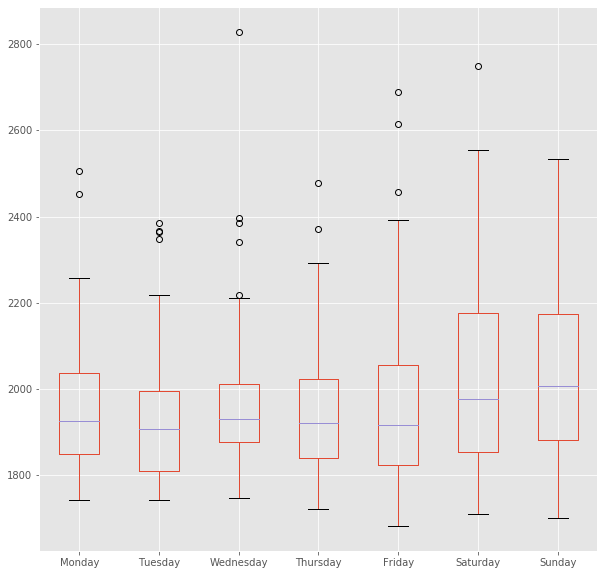

In [217]:
df_daily_Cal.boxplot(column=['Monday','Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday'], figsize=(10,10))

In [243]:
df_daily_Cal.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2018.305019,2011.792314,2412.540309,1970.516948,1784.059092,1870.794303,1927.947979
1,2153.492327,1888.396506,2150.210917,1902.838165,2078.744561,2093.000674,1981.836326
2,2456.150146,2009.151585,2495.012479,2186.139063,2199.373500,1864.317594,2397.549147
3,2362.656837,2204.472114,2554.222855,2391.848192,2293.107816,2385.448619,2217.794192
4,2040.875555,2137.574328,2207.743231,1937.558704,2019.933301,2142.597724,1915.134932
